In [1]:
import pandas as pd
import numpy as np
import librosa

def load_audio(audio_path):
    return librosa.load(audio_path, sr=None)

df = pd.read_csv('Path_DF.csv')
df['audio'] = df['Path'].apply(lambda chemin : load_audio(chemin)[0])
df = df.replace(['normal', 'anomaly'], [0,1])
df.head()

#essai sur un fichier quelconque
#audio, fe = load_audio(df.iloc[0,0])

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/managers.py:1976: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


,Path,Machine_Type,Dataset,Status,Machine_ID,Sample_ID,nb_echantillon,freq_echantillonnage,audio
0,Data/ToyConveyor/test/anomaly_id_01_00000176.wav,ToyConveyor,test,1,1,176,160000,16000,"[0.02078247, 0.0015563965, -0.021118164, -0.04..."
1,Data/ToyConveyor/test/normal_id_03_00000329.wav,ToyConveyor,test,0,3,329,160000,16000,"[-0.04989624, -0.060668945, -0.05819702, -0.05..."
2,Data/ToyConveyor/test/normal_id_01_00000291.wav,ToyConveyor,test,0,1,291,160000,16000,"[0.030273438, 0.013977051, 0.005218506, -0.001..."
3,Data/ToyConveyor/test/normal_id_01_00000285.wav,ToyConveyor,test,0,1,285,160000,16000,"[-0.06506348, -0.0687561, -0.06213379, -0.0473..."
4,Data/ToyConveyor/test/anomaly_id_01_00000162.wav,ToyConveyor,test,1,1,162,160000,16000,"[-0.020904541, -0.024841309, -0.011627197, -0...."


In [2]:
from time import time
t0 = time()

slider_train = df[(df.Dataset == 'train') & (df.Machine_Type == 'slider')]

slider_train_echan = pd.DataFrame(slider_train['audio'].tolist(), index=slider_train.index)

# Calcul du temps de la construction de slider_train
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 510.439 secondes


In [3]:
slider_train = pd.concat([slider_train[['Status', 'Machine_ID']],slider_train_echan], axis = 1)

In [4]:
slider_train

,Status,Machine_ID,0,1,2,3,4,5,6,7,...,159990,159991,159992,159993,159994,159995,159996,159997,159998,159999
11969,0,0,-0.018127,-0.025299,-0.024109,-0.029694,-0.031799,-0.027771,-0.025421,-0.009033,...,0.017487,0.023041,0.016357,0.006744,0.004974,-0.005707,-0.001160,-0.012787,-0.011383,-0.008881
11970,0,6,0.000305,-0.017334,0.000763,-0.015198,-0.008148,0.001862,-0.012970,-0.004730,...,0.005402,0.005554,0.003662,-0.001343,-0.003906,-0.007843,-0.012024,-0.015472,-0.013824,-0.012329
11971,0,0,0.004913,-0.005280,-0.011078,-0.016113,-0.016785,-0.015503,-0.015045,-0.017242,...,0.003723,0.002045,0.005310,0.000214,-0.001129,-0.007416,-0.013428,-0.011322,-0.013763,-0.006927
11972,0,6,-0.008331,-0.010315,-0.014160,-0.018188,-0.018433,-0.015381,-0.012390,-0.012268,...,-0.003998,0.000610,0.002319,-0.001282,0.002380,0.003998,0.001099,0.001801,0.002289,-0.003052
11973,0,2,0.008179,0.013306,0.012146,-0.005890,-0.013062,-0.003113,0.008881,0.007599,...,0.004059,0.004578,0.005676,0.011505,0.016693,0.010437,0.002625,0.005402,0.008362,0.011658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,0,2,0.015503,0.012482,0.014618,0.013702,0.017365,0.019928,0.012482,0.008636,...,0.001923,0.006531,0.007507,0.005524,0.005920,0.004730,0.001801,0.001038,-0.001190,0.001038
14769,0,4,-0.001831,-0.002716,-0.002319,-0.003143,0.005829,0.005585,0.002380,-0.001740,...,-0.006226,-0.015900,-0.013763,-0.013123,-0.016846,-0.011963,-0.013550,-0.002533,-0.009247,-0.011353
14770,0,2,0.015320,0.004944,-0.006195,0.007599,-0.005280,0.000488,-0.001099,0.000427,...,-0.005890,-0.004150,0.006622,0.014801,0.008026,0.017059,0.019592,0.019348,0.029755,0.026001
14771,0,0,0.002930,0.003296,-0.004669,-0.007385,0.000061,0.007141,0.007324,0.009583,...,-0.018097,-0.017517,-0.011444,-0.010101,-0.010254,-0.010345,-0.015656,-0.020325,-0.014008,-0.006805


In [5]:
t0 = time()

slider_test = df[(df.Dataset == 'test') & (df.Machine_Type == 'slider')]

slider_test_echan = pd.DataFrame(slider_test['audio'].tolist(), index=slider_test.index)
slider_test = pd.concat([slider_test[['Status', 'Machine_ID']],slider_test_echan], axis = 1)
# Calcul du temps de la construction de slider_train
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

slider_test

Réalisé en 99.499 secondes


,Status,Machine_ID,0,1,2,3,4,5,6,7,...,159990,159991,159992,159993,159994,159995,159996,159997,159998,159999
10679,0,6,0.012573,0.003967,0.004608,0.003418,0.014465,0.014801,0.016998,0.025604,...,-0.009613,-0.011505,-0.009064,-0.009247,-0.002350,0.006317,0.003998,0.004700,0.007385,0.004852
10680,1,0,0.005280,0.006531,-0.006073,-0.000305,0.011139,0.012726,0.007629,0.016479,...,0.003296,0.008026,0.001038,0.013489,0.015869,0.009735,0.013550,0.015686,0.010681,0.012268
10681,1,0,-0.017914,-0.025238,-0.011078,-0.015808,-0.022247,-0.014862,-0.015381,-0.014221,...,0.017303,0.017853,0.019043,0.017639,0.017975,0.016998,0.014618,0.012848,0.010315,0.008453
10682,0,6,0.010651,0.010651,0.005890,-0.000671,0.003265,0.002716,-0.004608,0.002319,...,-0.009521,-0.009491,-0.006836,-0.001373,0.001556,0.003571,-0.000153,0.005798,0.005035,0.000427
10683,0,2,-0.014771,-0.001862,0.000122,0.002258,-0.004944,-0.001129,0.001648,-0.008484,...,0.005402,-0.000519,-0.004517,-0.003540,-0.000671,0.006317,0.004303,0.008789,0.009491,0.011749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,1,0,-0.001923,-0.006897,-0.002045,0.003967,-0.004272,-0.019684,-0.027557,-0.029938,...,0.008728,0.005981,0.010712,0.014496,0.016632,0.019409,0.010315,-0.002380,0.001404,0.004028
11965,1,0,0.003326,0.002228,-0.000427,-0.001984,-0.005554,-0.007751,-0.006195,-0.005707,...,-0.006226,-0.008759,-0.009674,-0.006470,-0.006989,-0.010620,-0.010925,-0.008820,-0.011108,-0.011414
11966,0,2,-0.018372,-0.016266,-0.015533,-0.023010,-0.020477,-0.016144,-0.014496,-0.013397,...,-0.006622,-0.004059,0.000031,-0.003723,-0.008453,-0.011261,-0.005524,-0.003326,0.002686,0.007355
11967,0,2,-0.001099,-0.001556,-0.003082,-0.004425,-0.004028,-0.003998,-0.007843,-0.011688,...,-0.001160,-0.001770,-0.003601,-0.003876,-0.003815,-0.003296,-0.005676,-0.003906,-0.000488,0.000671


In [6]:
X_slider_train = slider_train.iloc[:,2:]
X_slider_test = slider_test.iloc[:,2:]
y_slider_train = slider_train['Status']
y_slider_test = slider_test['Status']

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 10)

lr.fit(X_slider_test, y_slider_test)

y_slider_pred = lr.predict(X_slider_train)


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_slider_train,y_slider_pred))

              precision    recall  f1-score   support

           0       1.00      0.08      0.16      2804
           1       0.00      0.00      0.00         0

    accuracy                           0.08      2804
   macro avg       0.50      0.04      0.08      2804
weighted avg       1.00      0.08      0.16      2804



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
pd.crosstab(y_slider_train, y_slider_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,237,2567


In [23]:
from sklearn import svm

clf = svm.SVC(gamma = 0.01, kernel = 'poly')

clf.fit(X_slider_test, y_slider_test)

y_slider_pred = clf.predict(X_slider_train)

In [24]:
print(classification_report(y_slider_train,y_slider_pred))
pd.crosstab(y_slider_train, y_slider_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    2804.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00    2804.0
   macro avg       0.00      0.00      0.00    2804.0
weighted avg       0.00      0.00      0.00    2804.0



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classe prédite,1
Classe réelle,
0,2804


In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, method = 'barnes_hut')

slider_train_tsne = tsne.fit_transform(slider_train_echan)

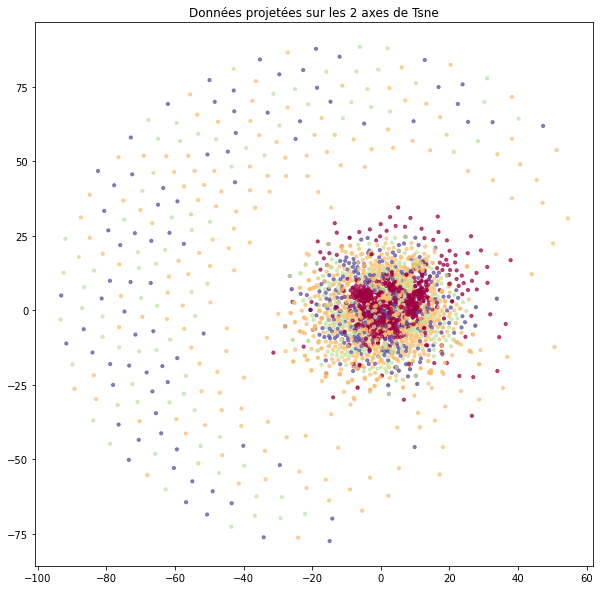

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.scatter(slider_train_tsne[:,0], slider_train_tsne[:,1], c = slider_train.Machine_ID, alpha = .7, s = 10, cmap=plt.cm.Spectral)
plt.title('Données projetées sur les 2 axes de Tsne');


In [34]:
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global slider_train
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    slider_train.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

# le fichier slider_train fait 7 Go ! Trop volumineux...